<a href="https://colab.research.google.com/github/sungjuGit/COSMOS_Ju/blob/main/COSMOS_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
import torch.nn as nn

from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split

torch.random.manual_seed(42)


First, we again generate data using random number generators but this time using PyTorch.

In [ ]:
x_data = torch.rand(100,1)
y_data = 1 + 2 * x_data + .1 * torch.randn(100, 1)

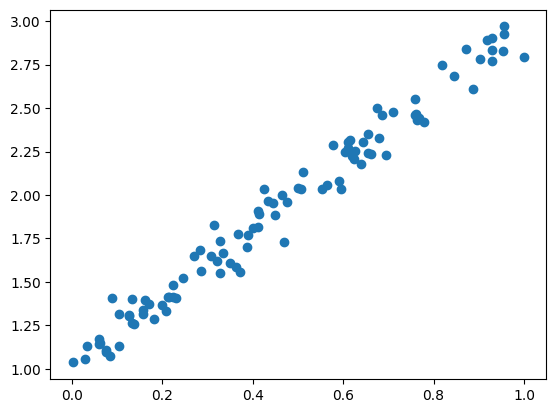

In [ ]:
plt.scatter(x_data, y_data)

We use a more professional DataLoader that can handle more complex data sets.

In [ ]:
dataset = TensorDataset(x_data, y_data)

train_dataset, val_dataset = random_split(dataset, [80, 20])

train_loader = DataLoader(dataset=train_dataset, batch_size=16)
val_loader = DataLoader(dataset=val_dataset, batch_size=20)

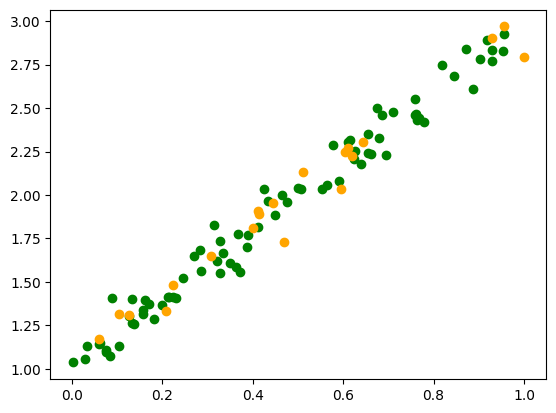

In [ ]:
plt.scatter(train_dataset[:][0], train_dataset[:][1], color="green")
plt.scatter(val_dataset[:][0], val_dataset[:][1], color="orange")

Here is our NN model (just a single line!).

In [ ]:
model = nn.Linear(1, 1)

In [ ]:
lr = 0.1

loss_fn = nn.MSELoss(reduction='mean')

optimizer = optim.SGD(model.parameters(), lr=lr)


We define the training function that calls a series of PyTorch functions to perform the forward process, loss and gradient evaluation, backpropagation, and parameter update.

In [ ]:
def train(model, loader, optimizer, loss_fn):

    epoch_loss = 0

    # set model to TRAIN mode
    model.train()

    for (x, y) in loader:

      # cleans out gradients
      optimizer.zero_grad()
      # make prediction
      y_pred = model(x)
      # Computes loss
      loss = loss_fn(y, y_pred)
      # Computes gradients
      loss.backward()
      # Updates parameters and zeroes gradients
      optimizer.step()

      epoch_loss += loss.item()

    return epoch_loss / len(loader)

We setup `make_train_setup` by specifying the learning rate, loss function, and optimizer.

We iteratively go through the gradient descents (optimization) by calling `make_train_step`.

In [ ]:
train(model, train_loader, optimizer, loss_fn)

1.3403203189373016

In [ ]:
n_epochs = 1000

for epoch in range(n_epochs):

    train_loss = train(model, train_loader, optimizer, loss_fn)

    #print(f'Epoch: {epoch+1}')
    #print(f'\tTrain Loss: {train_loss:.3f}')

print(model.state_dict())


OrderedDict([('weight', tensor([[1.9521]])), ('bias', tensor([1.0198]))])


In [ ]:
model.parameters

<bound method Module.parameters of Linear(in_features=1, out_features=1, bias=True)>

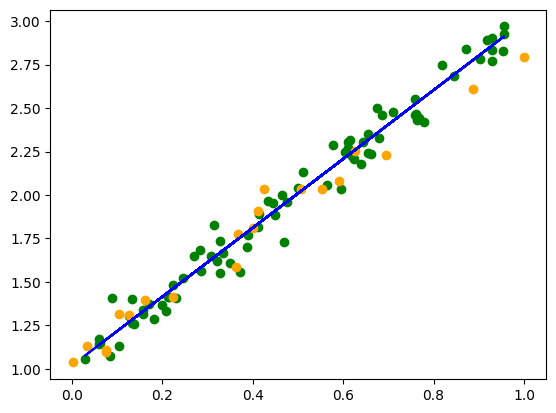

In [ ]:
plt.scatter(train_dataset[:][0], train_dataset[:][1], color="green")
plt.scatter(val_dataset[:][0], val_dataset[:][1], color="orange")
plt.plot(train_dataset[:][0], model.bias.detach() + model.weight.detach() * train_dataset[:][0], color="blue")

Calculate the loss for the validation set to check the accuracy of our linear regression results.

In [ ]:
val_losses = []
with torch.no_grad():

  model.eval()

  for x_val, y_val in val_loader:

    yhat = model(x_val)
    val_loss = loss_fn(y_val, yhat)
    val_losses.append(val_loss.item())

  print(val_losses)

[0.009964228607714176]
